In [1]:
%matplotlib inline

import json
import logging
from pathlib import Path
import random
import tarfile
import tempfile
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas_path
from tqdm import tqdm

In [2]:
import os
os.chdir('D:\GT\Courses\Deep_Learning\Project')

In [3]:
data_dir = r'D:/GT/Courses/Deep_Learning/Project/hateful_memes/hateful_memes'

test_path = data_dir + "/test_unseen.jsonl"
dftest = pd.read_json(test_path, lines=True)
dftest.head()

,id,img,label,text
0,15740,img/15740.png,1,when someone tells you how to bbq
1,38794,img/38794.png,1,when they say white folks don't know how to cook
2,60792,img/60792.png,1,the original derp-face
3,71824,img/71824.png,1,okay here you go! you piece of shit!
4,4796,img/04796.png,1,xboxone farming 1619 simulator


In [6]:
df = pd.read_csv(r'.\Submission\model-outputs\hateful_memes_run_test_2022-04-28T18_23_40_s1.csv')
df.head()

,id,proba,label
0,15740,0.016716,0
1,38794,0.992340,1
2,60792,0.423584,0
3,71824,0.665802,1
4,4796,0.751978,1


In [8]:
hf = pd.read_csv(r'.\Submission\model-outputs\hateful_memes_run_test_2022-04-28T18_26_20_s2.csv')
hf.head()

,id,proba,label
0,15740,0.000079,0
1,38794,0.997351,1
2,60792,0.637290,1
3,71824,0.000734,0
4,4796,0.999986,1


In [9]:
tol = 0.5
df1 = df.copy()
df1 = df1.rename({'proba':'probb'},axis=1)
df1 =  pd.concat([df1,hf.proba], axis=1)
df1['prob'] = df1[['probb', 'proba']].mean(axis=1)

df1 = df1[['id','prob']]
df1['label'] = df1.apply(lambda x: 1 if x.prob > tol else 0, axis=1)

df1.head()
df = df1.copy()
df.head()

,id,prob,label
0,15740,0.008397,0
1,38794,0.994845,1
2,60792,0.530437,1
3,71824,0.333268,0
4,4796,0.875982,1


In [10]:
name = 'visualBert_test_sub3.jpg'

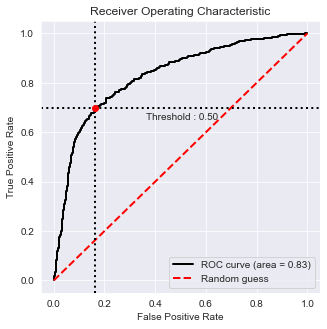

In [11]:
from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
bc = BinaryClassification(dftest.label, df.prob, labels=[0, 1])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
# plt.savefig(name)
plt.show()

0.8279946666666667


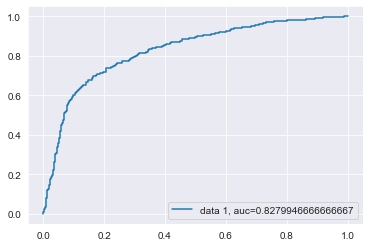

In [12]:
from sklearn import metrics
y_pred_proba = df.prob
fpr, tpr, _ = metrics.roc_curve(dftest.label,  y_pred_proba)
auc = metrics.roc_auc_score(dftest.label,  y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
print(auc)
# plt.savefig('image_6.jpg')
plt.show()

In [13]:
metrics.accuracy_score(dftest.label, df.label)

0.784